# **STOCK MARKET CLUSTERING**

In this project we will be extracting live Stock Market data from yahoo finance. We will find similarities amongst various companies using their stock stock market prices and then cluster them into different clusters using the K-means algorithm.

Note that this is an unsuppervised machine learning problem and will use an unsuppervised machine learning technique with the help of the K-means algorithm.

NB: "pandas_datareader" extract data from variouse internet sources into a Dataframe. Curently the following sources are supported


*   Yahoo! Finance
*   Google Finance
*  St. Louis FED (FRED)
* Kenneth French's data library
* World Bank
* Google Analytics



In [324]:
!pip install pandas_datareader

In [325]:
!pip install plotly

In [326]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import pandas_datareader.data as web
from sklearn.preprocessing import Normalizer



In [379]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}


In [430]:
companies = sorted(companies_dict.items(), key=lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Microsoft', 'MSFT'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [381]:
companies_sorted = [x[1] for x in companies]
companies_sorted

['AAPL',
 'AMZN',
 'AXP',
 'BA',
 'BAC',
 'CVX',
 'F',
 'GE',
 'HMC',
 'IBM',
 'INTC',
 'JNJ',
 'KO',
 'LMT',
 'MA',
 'MCD',
 'MSFT',
 'NOC',
 'PEP',
 'TM',
 'TXN',
 'VLO',
 'WBA',
 'XOM']

**NOTE:**

If you are using Google Colab, you might get an error like  "***RemoteDataError: No data fetched using 'YahooDailyReader'*** ", in such case, try using jupyter notebook or jupyter lab. 


Also, some companies might be out of public by the time you run this code and as such, no data will be fetched for such companies, try to take them out of the "***companies_dict***" or replace with any other company you wish. You can visit https://finance.yahoo.com/ to search for companies.

In [433]:
import yfinance as yf
from datetime import datetime
tickers = yf.Tickers(companies_sorted)
end_date = datetime.now().strftime('%Y-%m-%d')
df = tickers.history(period='max',end=end_date,interval='1m')
print(df)

[*********************100%***********************]  24 of 24 completed
                                Close                                     \
                                 AAPL       AMZN         AXP          BA   
Datetime                                                                   
2023-02-27 09:30:00-05:00  148.160004  94.529999  175.690002  199.449997   
2023-02-27 09:31:00-05:00  148.190002  94.330002  174.804993  199.959900   
2023-02-27 09:32:00-05:00  148.199997  94.349998  175.009995  199.707001   
2023-02-27 09:33:00-05:00  148.235001  94.580002  174.830002  199.764999   
2023-02-27 09:34:00-05:00  148.130005  94.613098  174.559998  199.375000   
...                               ...        ...         ...         ...   
2023-03-03 15:55:00-05:00  150.899994  94.824997  179.130005  215.160004   
2023-03-03 15:56:00-05:00  150.942093  94.824997  179.020004  215.095001   
2023-03-03 15:57:00-05:00  151.000000  94.864998  179.080002  215.000000   
2023-03-03 15:58:

In [384]:
df.head()

Close                                     \
                                 AAPL       AMZN         AXP          BA   
Datetime                                                                   
2023-02-27 09:30:00-05:00  148.160004  94.529999  175.690002  199.449997   
2023-02-27 09:31:00-05:00  148.190002  94.330002  174.804993  199.959900   
2023-02-27 09:32:00-05:00  148.199997  94.349998  175.009995  199.707001   
2023-02-27 09:33:00-05:00  148.235001  94.580002  174.830002  199.764999   
2023-02-27 09:34:00-05:00  148.130005  94.613098  174.559998  199.375000   

                                                                      \
                                 BAC         CVX        F         GE   
Datetime                                                               
2023-02-27 09:30:00-05:00  34.230000  162.830002  12.0010  84.175003   
2023-02-27 09:31:00-05:00  34.220001  162.660004  12.0011  84.059998   
2023-02-27 09:32:00-05:00  34.323799  162.559998  12.0599  84.010002   
2023-02-27 09:33:00-05:00  34.360001  162.664993  12.0650  83.849998   
2023-02-27 09:34:00-05:00  34.360001  162.550003  12.0750  83.525002   

                                                  ...   Volume           \
                                 HMC         IBM  ...       MA      MCD   
Datetime                                          ...                     
2023-02-27 09:30:00-05:00  26.305000  131.190002  ...  61253.0  70864.0   
2023-02-27 09:31:00-05:00  26.309999  131.195007  ...   3197.0  27081.0   
2023-02-27 09:32:00-05:00  26.344999  131.285004  ...   3945.0  12564.0   
2023-02-27 09:33:00-05:00  26.320000  131.229996  ...   2756.0   8900.0   
2023-02-27 09:34:00-05:00  26.325001  131.069305  ...   7517.0   4614.0   

                                                                         \
                                MSFT      NOC      PEP      TM      TXN   
Datetime                                                                  
2023-02-27 09:30:00-05:00  1248258.0  17429.0  83952.0  5200.0  63365.0   
2023-02-27 09:31:00-05:00    58224.0    241.0   8417.0   236.0   5905.0   
2023-02-27 09:32:00-05:00    69719.0   4069.0   2761.0   224.0   4582.0   
2023-02-27 09:33:00-05:00    61535.0    857.0   6567.0  1290.0   4259.0   
2023-02-27 09:34:00-05:00    56221.0   1097.0   9699.0     NaN   5290.0   

                                                       
                               VLO      WBA       XOM  
Datetime                                               
2023-02-27 09:30:00-05:00  54292.0  98454.0  221126.0  
2023-02-27 09:31:00-05:00   2962.0  18018.0   83253.0  
2023-02-27 09:32:00-05:00   3934.0  16129.0   59965.0  
2023-02-27 09:33:00-05:00   6575.0   7770.0   28936.0  
2023-02-27 09:34:00-05:00   5209.0   6975.0   28620.0  

[5 rows x 168 columns]

In [413]:
df.isna().sum()

Close   AAPL    0
        AMZN    0
        AXP     0
        BA      0
        BAC     0
               ..
Volume  TM      0
        TXN     0
        VLO     0
        WBA     0
        XOM     0
Length: 168, dtype: int64

In [402]:
df.dropna(axis=0,inplace=True)

In [414]:
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

In [415]:
#‘movement’ is the difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).
movements = stock_close - stock_open

In [416]:
sum_of_movement = stock_close - stock_open

In [417]:
for i in range(len(companies_sorted)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AAPL, Change:[ 4.49996948e-01  2.00042725e-02  1.19018555e-03  3.50036621e-02
  5.99060059e-02 -2.65701294e-01  3.38897705e-02  1.63497925e-01
 -8.79058838e-02  1.70989990e-01 -7.00073242e-02  2.99987793e-02
 -5.99975586e-02 -9.99450684e-03  2.20001221e-01 -1.84997559e-01
 -5.24902344e-02  6.99920654e-02 -2.00042725e-02  1.79992676e-01
 -2.00042725e-02  8.24890137e-02  0.00000000e+00  8.38928223e-02
  1.30004883e-01  0.00000000e+00  1.09695435e-01 -1.12594604e-01
 -9.50012207e-02  7.17010498e-02 -9.00268555e-03  9.99450684e-03
  1.34994507e-01 -2.18994141e-01 -6.99005127e-02 -6.70013428e-02
 -2.90405273e-01 -6.82983398e-02 -5.99975586e-02 -8.00018311e-02
 -6.99920654e-02 -8.99963379e-02 -7.01904297e-04  5.99975586e-02
 -1.68792725e-01  7.42950439e-02 -1.10000610e-01  2.98919678e-02
 -1.39999390e-01  9.00115967e-02 -1.22100830e-01  3.67889404e-02
 -2.99987793e-02  7.98950195e-02 -1.64901733e-01 -2.59994507e-01
  1.99890137e-03  9.99908447e-02 -1.00006104e-01  1.05010986e-01
  1.

## We will consider Amazon and Apple

You can do for any other company as you wish

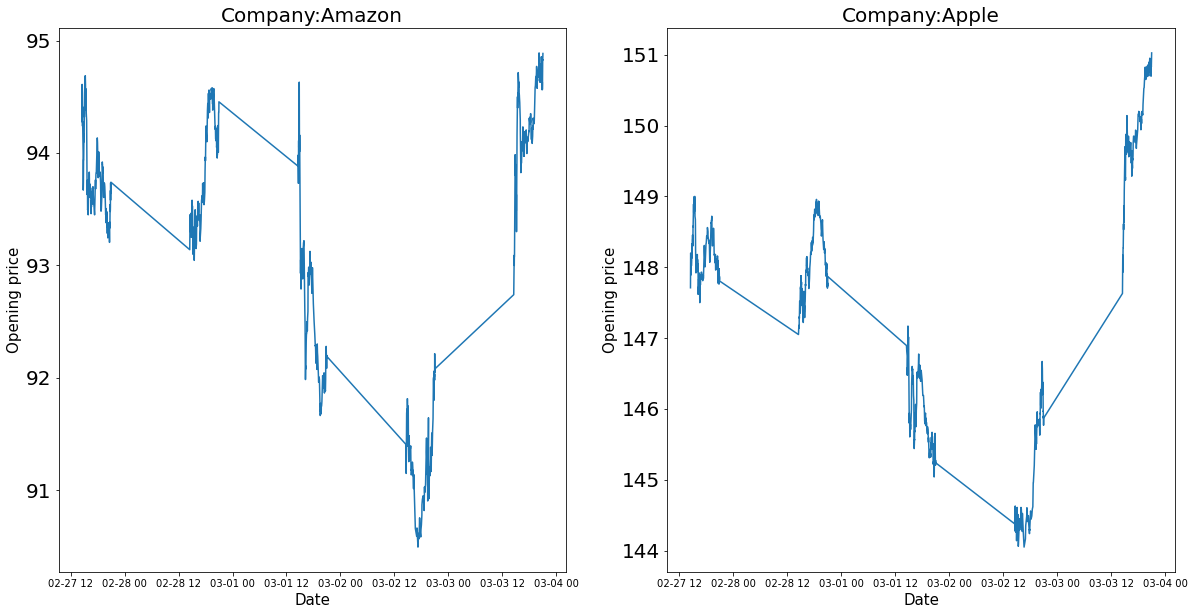

In [418]:
plt.figure(figsize = (20,10)) 
plt.subplot(1,2,1) 

plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AMZN'])
plt.subplot(1,2,2) 

plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AAPL'])

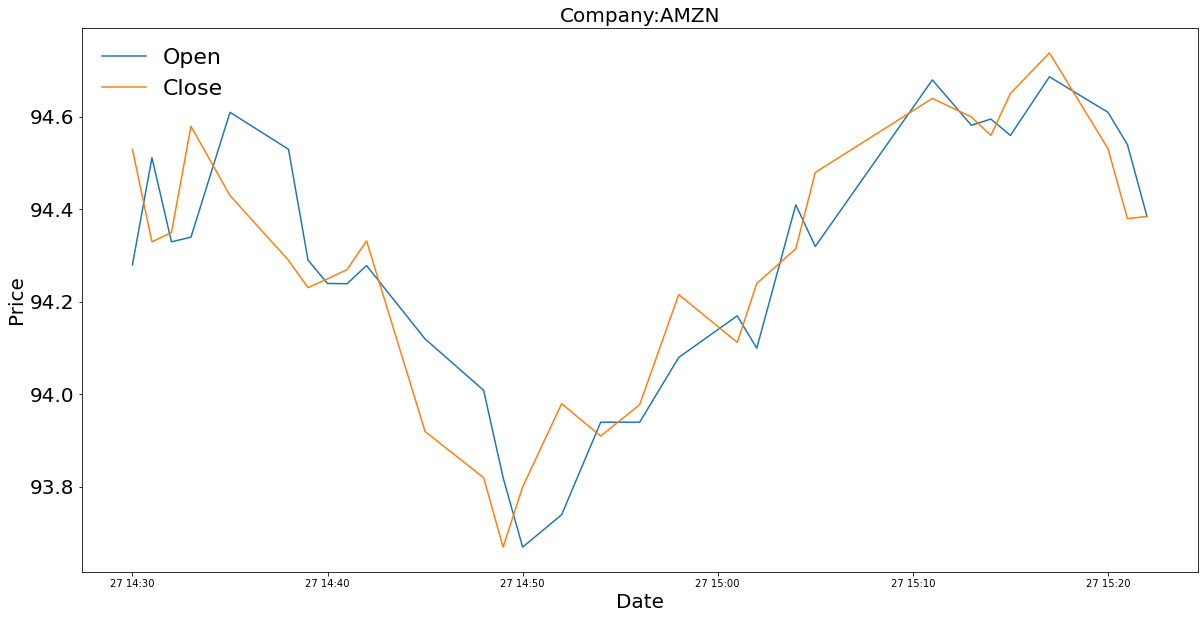

In [419]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:AMZN',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

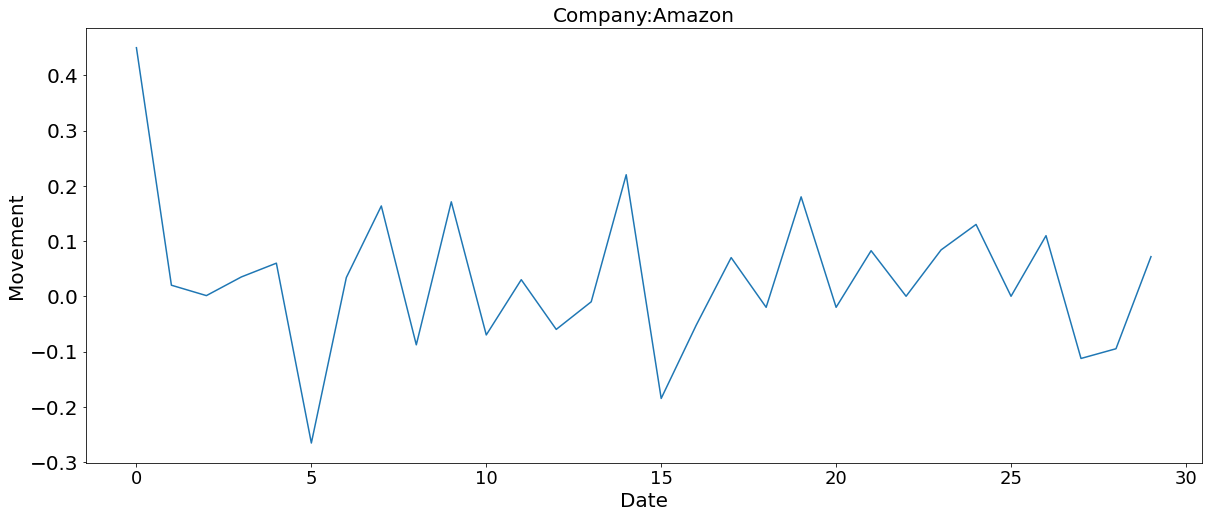

In [420]:
plt.figure(figsize = (20,8)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])

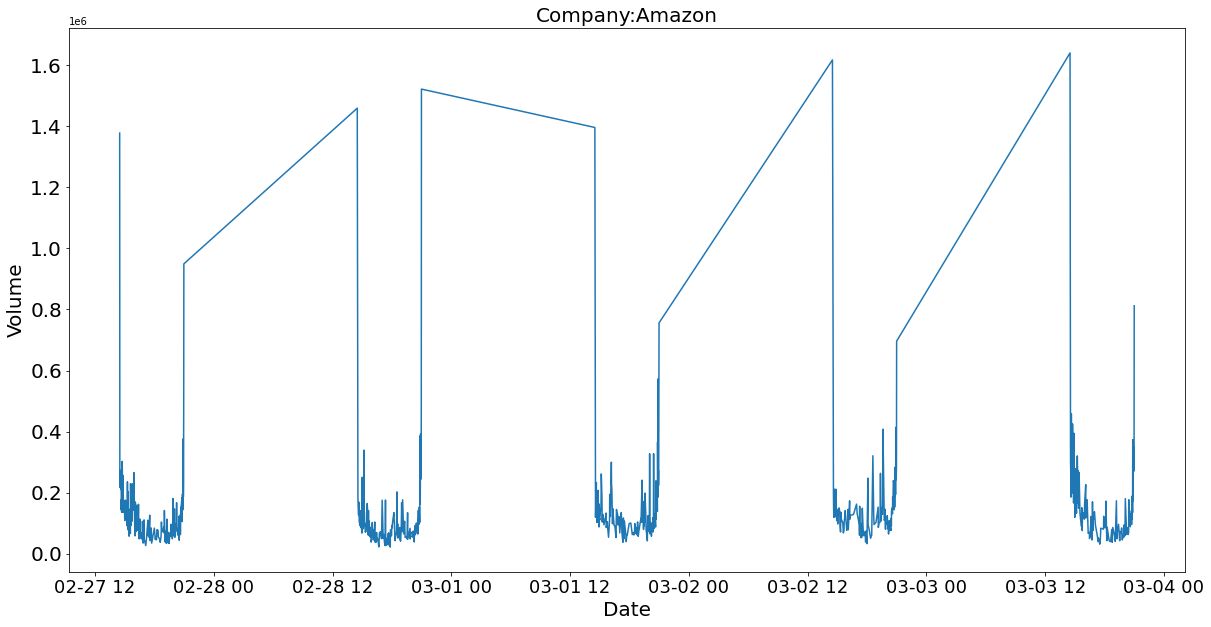

In [421]:
plt.figure(figsize = (20,10)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(df['Volume']['AMZN'],label = 'Open')

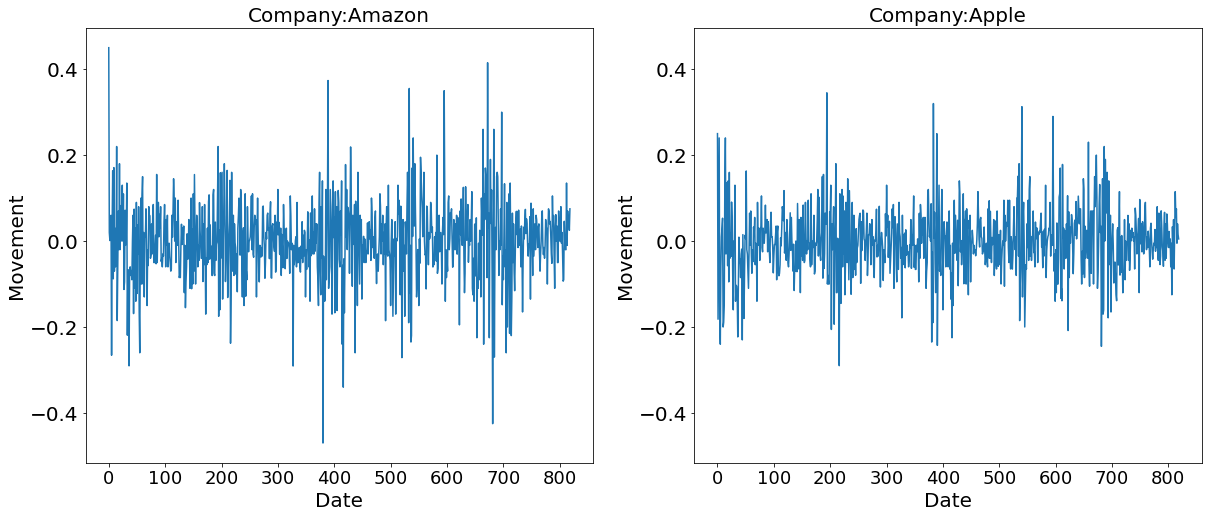

In [422]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

In [423]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform

In [424]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.36070092960261824
0.38728970298396537
-0.0004119307499702501


#### CREATING A PIPELINE

In [425]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters =5,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
predictions = pipeline.predict(movements)

In [426]:
predictions

array([2, 2, 4, 3, 4, 0, 2, 2, 2, 1, 4, 1, 1, 3, 4, 1, 2, 3, 1, 2, 4, 0,
       1, 0])

In [445]:
df1 = pd.DataFrame({'Predictions':predictions, 'companies': companies_sorted})

# Display df sorted by cluster label
print(df.sort_values('Predictions'))

    Predictions companies
23            0       XOM
21            0       VLO
5             0       CVX
18            1       PEP
15            1       MCD
12            1        KO
22            1       WBA
9             1       IBM
11            1       JNJ
7             2        GE
6             2         F
16            2      MSFT
19            2        TM
1             2      AMZN
8             2       HMC
0             2      AAPL
13            3       LMT
3             3        BA
17            3       NOC
10            4      INTC
4             4       BAC
14            4        MA
2             4       AXP
20            4       TXN


In [446]:
df1

,Predictions,companies
0,2,AAPL
1,2,AMZN
2,4,AXP
3,3,BA
4,4,BAC
5,0,CVX
6,2,F
7,2,GE
8,2,HMC
9,1,IBM


### Dimension Reduction-Principal Component Analysis(PCA)

In [449]:

from sklearn.decomposition import PCA
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters =10,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
predictions = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'Predictions':predictions,'companies':list(companies_dict.keys())}).sort_values(by=['Predictions'],axis = 0)

### Plot the Decision Boundary

<Figure size 432x288 with 0 Axes>

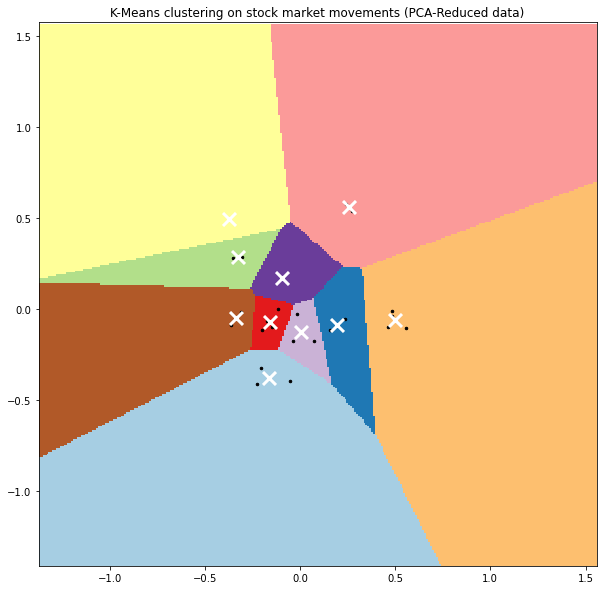

In [450]:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()